In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Twitch_game_data.csv',encoding= 'unicode_escape')
data.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [70]:
import csv

Avg_viewers_list = []
Avg_viewers_count = 0

Peak_viewers_list = []
Peak_viewers_count = 0

Streamers_list = []
Streamers_count = 0

Years = []

# starting year
yr = 2016

with open('Twitch_game_data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if yr == int(row['Year']):
            # otherwise track count
            Avg_viewers_count = Avg_viewers_count + int(row['Avg_viewers'])
            Peak_viewers_count = Peak_viewers_count  + int(row['Peak_viewers'])
            Streamers_count = Streamers_count + int(row['Streamers'])
            continue
        
        # if year changes, insert to list, clear count, and increment year
        if yr != int(row['Year']):
            Avg_viewers_list.append(Avg_viewers_count)
            Peak_viewers_list.append(Peak_viewers_count)
            Streamers_list.append(Streamers_count)
            
            Avg_viewers_count = 0
            Peak_viewers_count = 0
            Streamers_count = 0
            
            Years.append(yr)
            
            yr = yr + 1
    
    # if we read EOF, append the last datum
    Avg_viewers_list.append(Avg_viewers_count)
    Peak_viewers_list.append(Peak_viewers_count)
    Streamers_list.append(Streamers_count)
    Years.append(yr)
csvfile.close()
        
print(Avg_viewers_list)
print(Peak_viewers_list)
print(Streamers_list)

[6952072, 8157652, 11651676, 13591594, 23075628, 22980336]
[77947535, 86949453, 111386230, 115101162, 169234810, 165445612]
[18906613, 22108397, 37225232, 40099136, 58503303, 54547164]


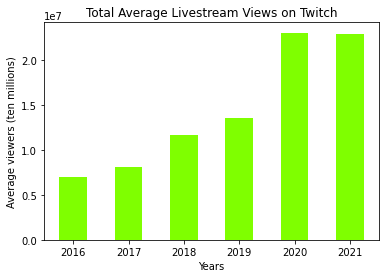

In [130]:
#Avg_viewers_dict = dict(zip(Years, Avg_viewers_list))
#print(Avg_viewers_dict)

plt.bar(Years, Avg_viewers_list, color='chartreuse', width=0.5)
plt.xlabel('Years')
plt.ylabel('Average viewers (ten millions)')
plt.title('Total Average Livestream Views on Twitch')
plt.show()

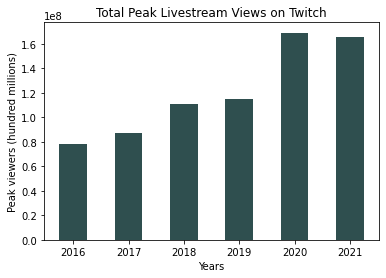

In [127]:
plt.bar(Years, Peak_viewers_list, color='darkslategrey', width=0.5)
plt.xlabel('Years')
plt.ylabel('Peak viewers (hundred millions)')
plt.title('Total Peak Livestream Views on Twitch')
plt.show()

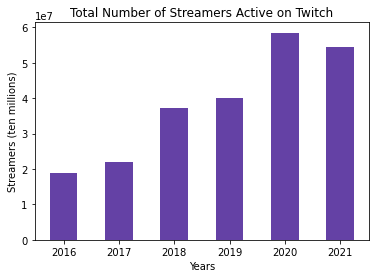

In [126]:
plt.bar(Years, Streamers_list, color='#6441a5', width=0.5)
plt.xlabel('Years')
plt.ylabel('Streamers (ten millions)')
plt.title('Total Number of Streamers Active on Twitch')
plt.show()

In [119]:
def plotByDifference(list, time, title, xlabel, ylabel):
    Diff_list = []
    Diff_time = []
    
    for i in range(1, len(list)):
        Diff_list.append(list[i]-list[i-1])
        Diff_time.append(str(time[i-1]) + '-' + str(time[i]))

    colors = []
    for element in Diff_list:
        if element < 0:
            colors.append('red')
        else:
            colors.append('darkcyan')

    plt.bar(Diff_time, Diff_list, color=colors, width=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(y=0, color='k', linewidth=0.5, linestyle='-')
    plt.title(title)
    plt.show()

    colors = []

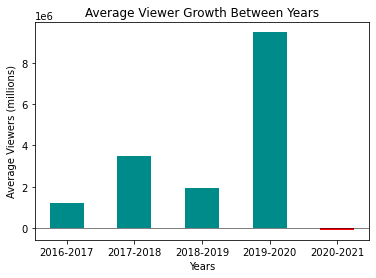

In [123]:
plotByDifference(Avg_viewers_list, Years, 'Average Viewer Growth Between Years', 'Years', 'Average Viewers (millions)')

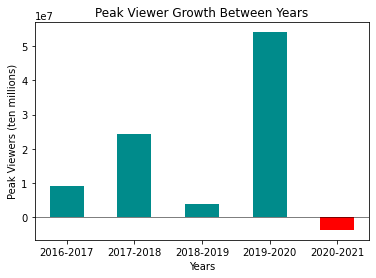

In [132]:
plotByDifference(Peak_viewers_list, Years, 'Peak Viewer Growth Between Years', 'Years', 'Peak Viewers (ten millions)')

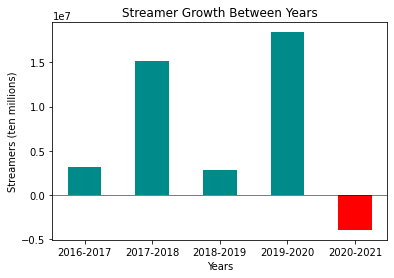

In [131]:
plotByDifference(Streamers_list, Years, 'Streamer Growth Between Years', 'Years', 'Streamers (ten millions)')

In [155]:
# Let's compare some of the most popular games streamed and see how they trended MONTHLY

fortnite = [] #1
league = [] #2
amongus = [] #3
csgo = [] #4
gtav = [] #5
valorant = [] #6
justchatting = [] #7
apexlegends = [] #8
dota2 = [] #9
minecraft = [] #10

def getPeak(list, game_name):
    with open('Twitch_game_data.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            # append peak viewer where game name is matched
            if str(row['Game']) == game_name:
                list.append(int(row['Peak_viewers']))
                
    list.append(int(row['Peak_viewers'])) # append last
    csvfile.close()
    return list

def prependMissingViews(list, length):
    for i in range(len(list), length):
        list.insert(0, 0)
        
    #print(len(list))
    return list

# get list of monthly peaks
fortnite = getPeak(fortnite, "Fortnite")
league = getPeak(league, "League of Legends")
amongus = getPeak(amongus, "Among Us")
csgo = getPeak(csgo, "Counter-Strike: Global Offensive")
gtav = getPeak(gtav, "Grand Theft Auto V")
valorant = getPeak(valorant, "VALORANT")
justchatting = getPeak(justchatting, "Just Chatting")
apexlegends = getPeak(apexlegends, "Apex Legends")
dota2 = getPeak(dota2, "Dota 2")
minecraft = getPeak(minecraft, "Minecraft")

# Kaggle only has 70 months of data, for the lists < 70 (meaning the game was probably new),
# we need the prepend 0 for the number of views
sz = 70
fortnite = prependMissingViews(fortnite, sz)
league = prependMissingViews(league, sz)
amongus = prependMissingViews(amongus, sz)
csgo = prependMissingViews(csgo, sz)
gtav = prependMissingViews(gtav, sz)
valorant = prependMissingViews(valorant, sz)
justchatting = prependMissingViews(justchatting, sz)
apexlegends = prependMissingViews(apexlegends, sz)
dota2 = prependMissingViews(dota2, sz)
minecraft = prependMissingViews(minecraft, sz)

# we don't actually need this
count_list = []
for i in range(0, sz):
    count_list.append(0)

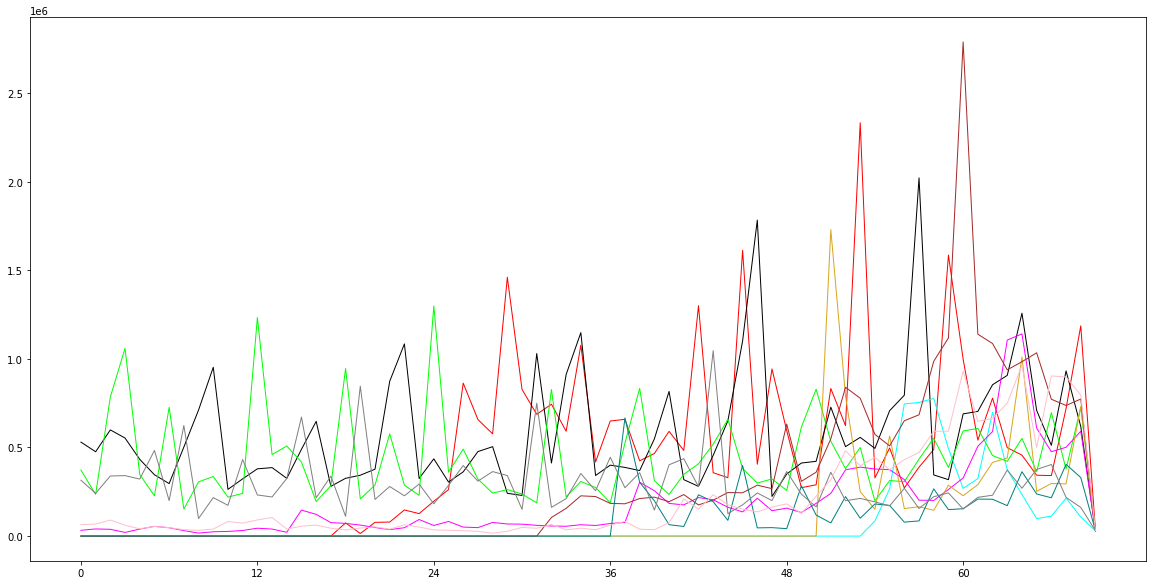

In [195]:
# Let's plot (this might be a bit messy, so we'll scale the figure)

plt.figure(figsize=(20,10))
plt.plot(fortnite, color='red', linewidth=1, zorder=1)
plt.plot(league, color='black', linewidth=1, zorder=2)
plt.plot(amongus, color='cyan', linewidth=1, zorder=3)
plt.plot(csgo, color='lime', linewidth=1, zorder=4)
plt.plot(gtav, color='magenta', linewidth=1, zorder=5)
plt.plot(valorant, color='goldenrod', linewidth=1, zorder=6)
plt.plot(justchatting, color='brown', linewidth=1, zorder=7)
plt.plot(apexlegends, color='teal', linewidth=1, zorder=8)
plt.plot(dota2, color='gray', linewidth=1, zorder=9)
plt.plot(minecraft, color='pink', linewidth=1, zorder=10)
plt.xticks(np.arange(0, sz, 12)) # 12 months = 1 yeah
plt.show()

# From this graph, we can tell:

# 2020, we see that most of the games are on the rise since cancelation of work, school, events means
# more indoor activity. 

# Then in 2021, these games start to dwindle and fall down in popular a bit, but we notice dominance in
# socializing (i.e. Just Chatting).

# By 2021, we see that Just Chatting (colored brown) was the most popular stream on Twitch
# Since there's less social activity outside due to pandemic, it makes sense people will bring social activity inside

# Fortnite (colored red) starts to overtake League of Legends by 2017-2018, which explains the growth
# of viewership and streaming between those years. Fortnite was a phenomenon in Twitch's growth.

# League (colored black) has been consistently popular, and at times rivaling Fortnite.

In [ ]:
# Now how about growth between each month for each game?